In [246]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [247]:
train_df=pd.read_csv("Seniors.csv",index_col=0)
test_df = pd.read_csv("Juniors.csv", index_col=0)

In [248]:
train_df.dtypes
test_df.drop(test_df.columns[0], axis=1, inplace=True)

In [249]:
print(train_df["Quality Rating"].min())

1.4216532111317548


In [250]:
# Define base features and degrees to expand
poly_features = [
    "Temperature (°C)",
    "Material Fusion Metric",
    "Material Transformation Metric"
]
max_degree = 7
for feature in poly_features:
    for degree in range(2, max_degree + 1):
        new_col = f"{feature}^{degree}"
        train_df[new_col] = train_df[feature] ** degree
        test_df[new_col] = test_df[feature] ** degree

In [252]:
test_df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Temperature (°C)^2,Temperature (°C)^3,Temperature (°C)^4,Temperature (°C)^5,Temperature (°C)^6,...,Material Fusion Metric^4,Material Fusion Metric^5,Material Fusion Metric^6,Material Fusion Metric^7,Material Transformation Metric^2,Material Transformation Metric^3,Material Transformation Metric^4,Material Transformation Metric^5,Material Transformation Metric^6,Material Transformation Metric^7
0.0,270.264688,11.023763,2979.333789,74382.645868,1.974082e+07,73043.001351,1.974094e+07,5.335280e+09,1.441938e+12,3.897049e+14,...,3.061163e+19,2.276974e+24,1.693674e+29,1.259799e+34,3.897001e+14,7.693000e+21,1.518661e+29,2.997963e+36,5.918225e+43,1.168306e+51
1.0,147.113440,24.851899,3656.048303,36991.316027,3.183265e+06,21642.364258,3.183883e+06,4.683919e+08,6.890675e+10,1.013711e+13,...,1.872402e+18,6.926262e+22,2.562115e+27,9.477602e+31,1.013318e+13,3.225659e+19,1.026813e+26,3.268617e+32,1.040487e+39,3.312147e+45
2.0,251.636694,19.861983,4998.003812,71156.545998,1.593350e+07,63321.025757,1.593389e+07,4.009552e+09,1.008950e+12,2.538890e+14,...,2.563654e+19,1.824208e+24,1.298043e+29,9.236427e+33,2.538764e+14,4.045139e+21,6.445322e+28,1.026965e+36,1.636315e+43,2.607223e+50
3.0,226.765023,23.301227,5283.903266,64073.710961,1.166025e+07,51422.375489,1.166080e+07,2.644261e+09,5.996258e+11,1.359742e+14,...,1.685464e+19,1.079939e+24,6.919573e+28,4.433627e+33,1.359615e+14,1.585346e+21,1.848553e+28,2.155460e+35,2.513321e+42,2.930595e+49
4.0,291.025207,16.896895,4917.422268,89519.819801,2.464829e+07,84695.671048,2.464858e+07,7.173357e+09,2.087628e+12,6.075523e+14,...,6.422096e+19,5.749049e+24,5.146538e+29,4.607172e+34,6.075382e+14,1.497478e+22,3.691026e+29,9.097749e+36,2.242440e+44,5.527230e+51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453.0,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,39144.783139,7.744811e+06,1.532314e+09,3.031690e+11,5.998210e+13,...,2.487780e+18,9.880184e+22,3.923901e+27,1.558372e+32,5.998104e+13,4.645377e+20,3.597725e+27,2.786345e+34,2.157953e+41,1.671279e+48
1454.0,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,58253.271108,1.405984e+07,3.393444e+09,8.190319e+11,1.976792e+14,...,1.541337e+19,9.657660e+23,6.051267e+28,3.791584e+33,1.976716e+14,2.779179e+21,3.907407e+28,5.493649e+35,7.723836e+42,1.085939e+50
1455.0,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,43697.821702,9.134603e+06,1.909500e+09,3.991623e+11,8.344097e+13,...,1.070193e+19,6.121076e+23,3.501009e+28,2.002437e+33,8.343062e+13,7.620583e+20,6.960668e+27,6.357899e+34,5.807328e+41,5.304435e+48
1456.0,163.359996,24.332133,3974.897121,41092.392901,4.358913e+06,26686.488147,4.359505e+06,7.121686e+08,1.163399e+11,1.900528e+13,...,2.851318e+18,1.171675e+23,4.814693e+27,1.978473e+32,1.900012e+13,8.281985e+19,3.610045e+26,1.573587e+33,6.859128e+39,2.989834e+46


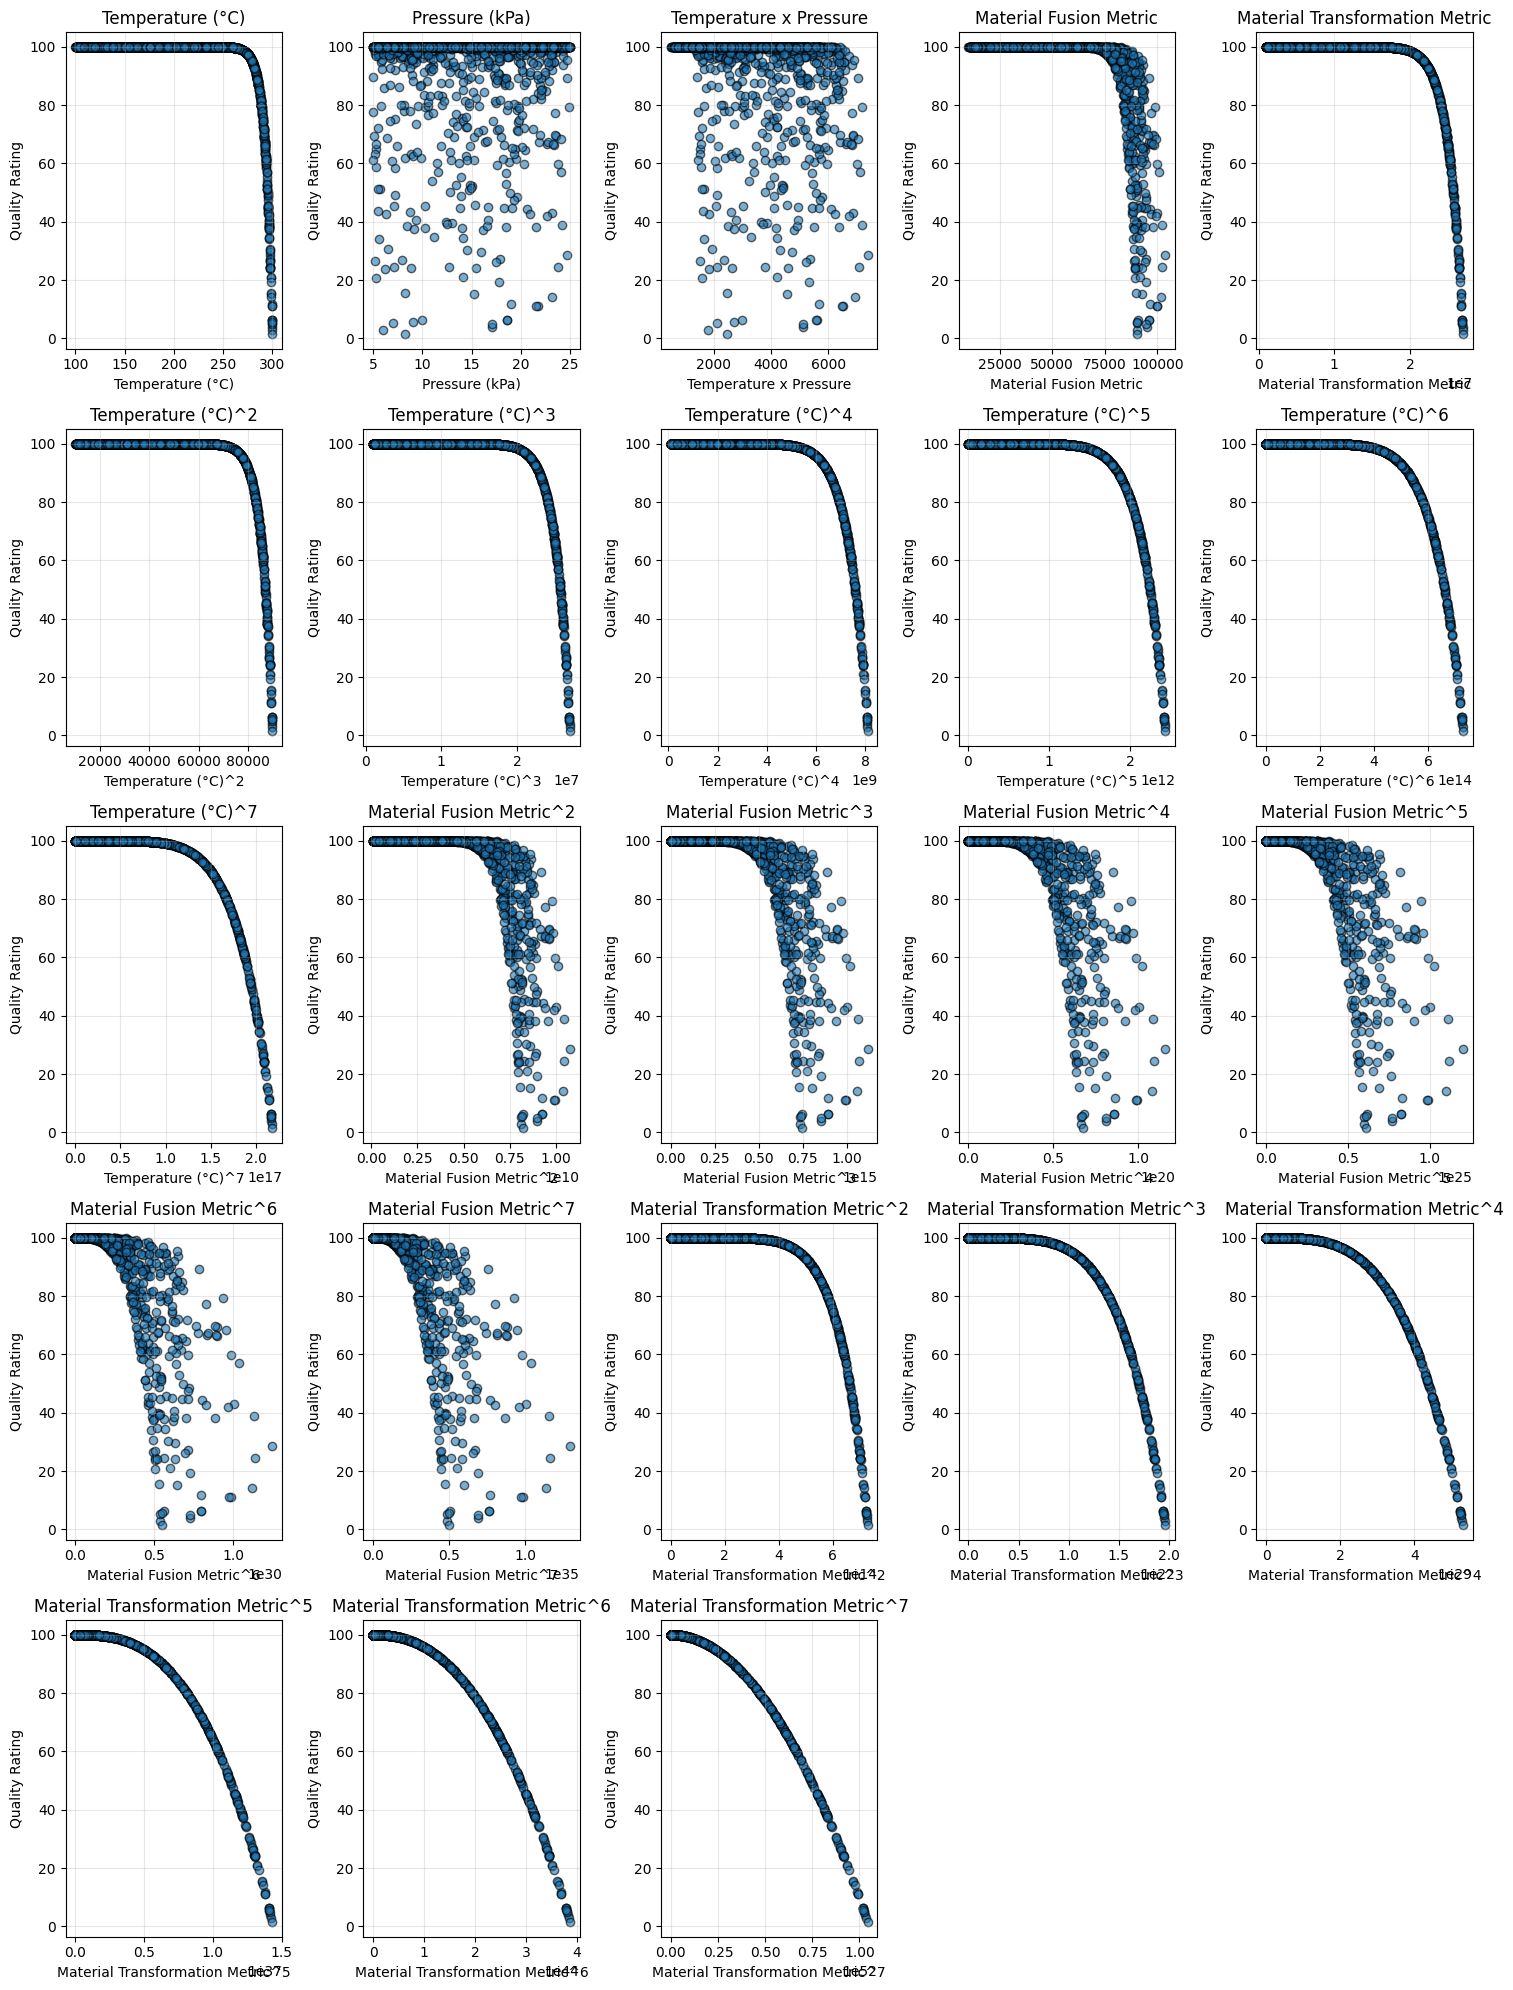

In [253]:
plt.figure(figsize=(15, 20))
for i,col in enumerate(train_df.columns.drop('Quality Rating'),1):
    plt.subplot(5, 5, i)
    plt.scatter(train_df[col], train_df['Quality Rating'], alpha=0.6, edgecolor='k')
    plt.title(col, fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Quality Rating", fontsize=10)
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

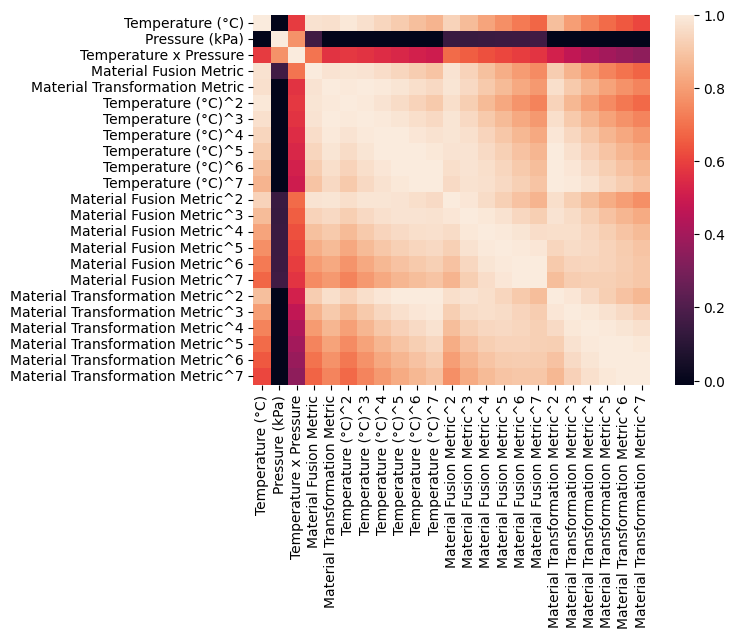

In [254]:
num_cols=train_df.select_dtypes(include=[np.number]).columns.drop("Quality Rating")
train_df_num=train_df[num_cols]
corr_matrix=train_df_num.corr()
sns.heatmap(corr_matrix)
plt.plot

In [255]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_df[num_cols]=scaler.fit_transform(train_df[num_cols])
test_df[num_cols]=scaler.transform(test_df[num_cols])

In [258]:
x_train=train_df[num_cols].values.astype('float64')
y_train=train_df["Quality Rating"].values.astype('float64')
x_test=test_df.values.astype('float64')
x_train.shape

(2500, 23)

In [259]:
def compute_cost(X,y,w,b):
    cost=0.0
    m=X.shape[0]
    f_wb=np.dot(X,w)+b
    cost=cost+(f_wb-y)**2
    return np.mean(cost)

In [260]:
def grad_descent(X,y,w,b,alpha,num_iters):
    m=X.shape[0]
    J_history=[]
    for i in range(num_iters):
        f_wb=np.dot(X,w)+b
        err=f_wb-y
        dj_dw=np.dot(X.T,err)
        dj_db=np.sum(err)
        dj_dw/=m
        dj_db/=m
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        J_history.append(compute_cost(X,y,w,b))
        if i%100 == 0:
           print(f"Iteration {i:4d}: Cost {J_history[-1]}")
    return w,b,J_history

In [261]:
w_init=np.zeros(x_train.shape[1])
b_init=0.
alpha=0.0001
iterations=100000
weights,bias,cost=grad_descent(x_train,y_train,w_init,b_init,alpha,iterations)
print("Final weights :",weights)
print("Final bias :",bias)
print("Final cost val :",cost[-1])

Iteration    0: Cost 9398.296572023528
Iteration  100: Cost 9183.08081542703
Iteration  200: Cost 8981.578109620958
Iteration  300: Cost 8790.466069247579
Iteration  400: Cost 8607.474072868657
Iteration  500: Cost 8431.043747414544
Iteration  600: Cost 8260.099184165367
Iteration  700: Cost 8093.891418301218
Iteration  800: Cost 7931.893168241772
Iteration  900: Cost 7773.727589650861
Iteration 1000: Cost 7619.120049833495
Iteration 1100: Cost 7467.86548188999
Iteration 1200: Cost 7319.806282999332
Iteration 1300: Cost 7174.817348849159
Iteration 1400: Cost 7032.795937776838
Iteration 1500: Cost 6893.654803684181
Iteration 1600: Cost 6757.317541321513
Iteration 1700: Cost 6623.715428991693
Iteration 1800: Cost 6492.785284812235
Iteration 1900: Cost 6364.468009067763
Iteration 2000: Cost 6238.707591028382
Iteration 2100: Cost 6115.45043024156
Iteration 2200: Cost 5994.644870783975
Iteration 2300: Cost 5876.240879768809
Iteration 2400: Cost 5760.189823608518
Iteration 2500: Cost 5646.44

In [262]:
def function(w,b,x):
    return (np.dot(x,w)+b)

In [263]:
y_min = min(min(y_train),min(function(weights,bias,x_train)))
y_max= max(max(y_train),max(function(weights,bias,x_train)))
y = np.linspace(y_min,y_max)
x = y  # x is equal to y

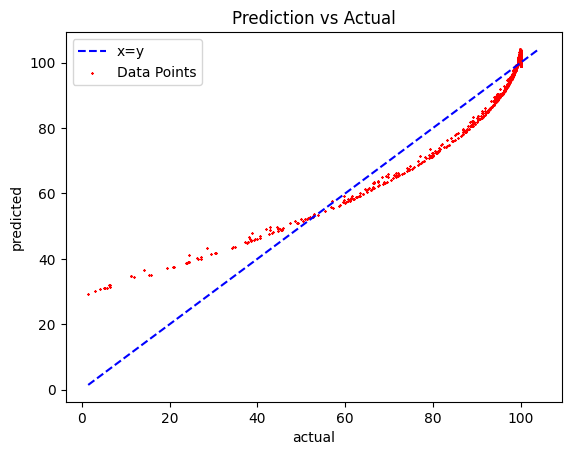

In [264]:
plt.plot(x, y, color="blue",linestyle = "--", label="x=y")
plt.scatter(y_train,function(weights,bias,x_train), color='red', marker='x', s=1, label='Data Points')
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("Prediction vs Actual")
plt.legend()
plt.show()

In [265]:
y_pred=function(weights,bias,x_train)
from sklearn.metrics import r2_score
print(r2_score(y_train,y_pred))

0.9349106746569741


Text(0.5, 0, 'Prediction Error')

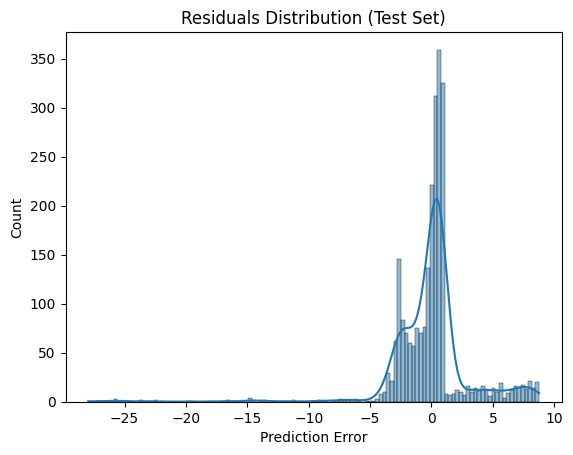

In [266]:
import seaborn as sns

residuals = y_train - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (Test Set)")
plt.xlabel("Prediction Error")

In [267]:
pred=function(weights,bias,x_test)
pred = np.clip(pred,0,100)
print(pred.size)
print(x_test.shape[0])

1458
1458


In [268]:
pd.DataFrame(pred).to_csv("output.csv",index=False,header=["output"])

In [269]:
data=pd.read_csv("Juniors.csv")
data.drop(data.columns[0], axis=1, inplace=True)
data.drop("Unnamed: 0",axis=1,inplace=True)
data = data.iloc[:len(pred)]
data["Quality Ratings"] = pred
data["Quality Ratings"]=pred

In [270]:
data

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Ratings
0,270.264688,11.023763,2979.333789,74382.645868,1.974082e+07,97.341544
1,147.113440,24.851899,3656.048303,36991.316027,3.183265e+06,98.994887
2,251.636694,19.861983,4998.003812,71156.545998,1.593350e+07,100.000000
3,226.765023,23.301227,5283.903266,64073.710961,1.166025e+07,100.000000
4,291.025207,16.896895,4917.422268,89519.819801,2.464829e+07,65.847252
...,...,...,...,...,...,...
1453,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,100.000000
1454,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,100.000000
1455,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,100.000000
1456,163.359996,24.332133,3974.897121,41092.392901,4.358913e+06,99.035488


In [218]:
data.to_csv("Data.csv", index=False)